In [37]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
from google.colab import widgets
import time
import copy as cp
import random
import math

In [38]:
class GridEnvironment(gym.Env):
    
    def __init__(self, environment_type):

        self.environment_type = environment_type
        self.environment_width = 4
        self.environment_height = 4

        self.observation_space = spaces.Discrete(self.environment_width * self.environment_height)
        self.action_space = spaces.Discrete(4)

        self.number_of_agents = 1
        self.agent_pos = np.asarray([0, 0])
        self.goal_pos = np.asarray([3, 3])

        self.candy_pos = np.asarray([0, 3])
        self.diamond_pos = np.asarray([1, 3])
        self.coin_pos = np.asarray([2, 1])

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.candy_pos)] = 0.4
        self.state[tuple(self.diamond_pos)] = 0.3
        self.state[tuple(self.coin_pos)] = 0.2
        
        self.timestep = 0
        self.max_timesteps = 10
        self.epsilon = 0.9


        
    def reset(self):
        self.timestep = 0
        self.agent_pos = np.asarray([0, 0])
        self.goal_pos = np.asarray([3, 3])
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        return observation
    
    def step(self, action: int):
        rand_num = np.random.random()

        # if self.environment_type != "deterministic":
        #   if np.random.random() > self.epsilon: # exploitation
        #       action = random.choice([0,1,2,3])
         
        if action == 0:
            self.agent_pos[1] += 1 # right
        if action == 1:
          self.agent_pos[0] += 1 # down
        if action == 2:
          self.agent_pos[1] -= 1 # left
        if action == 3:
          self.agent_pos[0] -= 1 # up
        

        self.agent_pos = list(np.clip(self.agent_pos, 0, 3))
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        
        self.state[tuple(self.candy_pos)] = 0.4
        self.state[tuple(self.diamond_pos)] = 0.3
        self.state[tuple(self.coin_pos)] = 0.2


        observation = self.state.flatten()
        
        reward = -1
        terminal_state_reached = False
        if (self.agent_pos == self.goal_pos).all():
            terminal_state_reached = True
            reward = 10
        if (self.agent_pos == self.diamond_pos).all():
            reward = 5
        if (self.agent_pos == self.candy_pos).all():
            reward = 3
        if (self.agent_pos == self.coin_pos).all():
            reward = 1
            
        self.timestep += 1
        done = True if (self.timestep > self.max_timesteps) or terminal_state_reached else False
        
        
        info = {}
        action_new = action
        
        return observation, reward, done,terminal_state_reached, action_new


    def render(self):
        plt.figure()
        plt.imshow(self.state)


In [39]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

In [40]:
class QAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def qaction(self, Q_table,epsilon):

    old_state_idx = self.env.agent_pos[1] + (self.env.agent_pos[0] * env.environment_width)
    
    if np.random.uniform(0,1) < epsilon:
      action = random.choice([0,1,2,3])
    else:
      action = np.argmax(Q_table[old_state_idx])
    
    return action

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

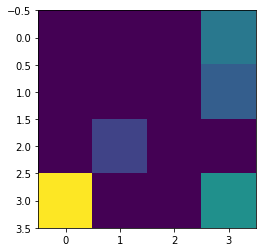

<IPython.core.display.Javascript object>

In [43]:
env = GridEnvironment("deterministic")
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 2)
with output_grid.output_to(0, 1):
  env.render()


data = []
while env.timestep < env.max_timesteps:
  action = agent.step(obs)
  old_action = action
  if env.environment_type != "deterministic":
    if np.random.random() > env.epsilon: # exploitation
      action = random.choice([0,1,2,3])
      
  obs, reward, done, terminal_state_reached, action_new = env.step(action)
  
  #print("Timestep: {2}, action taken by agent: {0}, action done in env: {1}, state is \n {3}".format(action,action_new, env.timestep, env.state))
  data.append([env.timestep, old_action, action_new])
  with output_grid.output_to(0, 1):
    output_grid.clear_cell()
    env.render()
  if done:
    break
  # print()
  # print()
  # output_grid

  time.sleep(1)


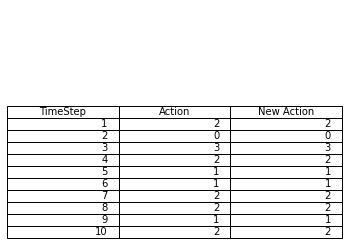

In [44]:
col_headers = ['TimeStep', 'Action', 'New Action']
plt.subplot(212)
plt.axis('off')
plt.table(cellText=data, colLabels=col_headers)
plt.show()

In [45]:
def Q_table_update(alpha,gamma,R,epsilon,Q_table,action,agent_pos,old_state_idx):
    next_state_num = agent_pos[1] + (agent_pos[0] * env.environment_width)
    Q_table[old_state_idx][action]  = Q_table[old_state_idx][action]+  (alpha *(R+(gamma * np.max(Q_table[next_state_num]) - Q_table[old_state_idx][action])))


In [46]:
def SARSA_update(alpha,gamma,R,epsilon,Q_table,action,agent_pos,old_state_idx,new_action):
    next_state_num = agent_pos[1] + (agent_pos[0] * env.environment_width)
    Q_table[old_state_idx][action]  = Q_table[old_state_idx][action]+  (alpha *(R+(gamma * Q_table[next_state_num][new_action] - Q_table[old_state_idx][action])))


In [49]:
####QLearning###
alpha = 0.1
gamma = 0.9
epsilon = 1
epsilon_initial = 1
epsilon_final = 0.01
episode_number = 1

nstates = env.environment_width * env.environment_height
nactions = env.action_space.n
# Q_table = np.random.uniform(0,1,size=(nstates,nactions))
# Q_table[-1] = 0
Q_table = np.zeros((nstates,nactions))
env = GridEnvironment("deterministic")
agent = QAgent(env)
env.max_timesteps = 16
number_of_episodes = 1000
episode_number = 0
obs = env.reset()
done = False
decay_factor = math.pow((epsilon_final / epsilon_initial),(1/number_of_episodes))
#print(decay_factor)
output_grid = widgets.Grid(1, 2)
# with output_grid.output_to(0, 1):
#   env.render()


data = []
reward_per_episode = []
epsilon_per_episode = []
epsilon_per_episode.append(epsilon)

for episode in range(number_of_episodes):
  env.reset()
  episode_reward = 0
  done = False
  Q_table_old = Q_table.copy()
  while done!=True:
    #Q_table[0] = 0
    Q_table[-1] = 0
    #action = agent.step(obs)
    action = agent.qaction(Q_table,epsilon)
    if env.environment_type != "deterministic":
      if np.random.random() > env.epsilon: # exploitation
        action = random.choice([0,1,2,3])

    old_state_idx = env.agent_pos[1] + (env.agent_pos[0] * env.environment_width)
    obs, reward, done,terminal_state_reached, action_new = env.step(action)
    episode_reward+=reward
    Q_table_update(alpha,gamma,reward,epsilon,Q_table,action_new,env.agent_pos,old_state_idx)
    Q_table[-1] = 0

    #print(env.timestep)
    # if env.timestep % 100 == 0:
    #   print(Q_table)

    # if terminal_state_reached is True:
      
    #   reward_per_episode.append(episode_reward)
    #   env.reset()
    #   episode_number+=1
    #print(Q_table)
    #print("Timestep: {2}, action taken by agent: {0}, action done in env: {1}, state is \n {3}".format(action,action_new, env.timestep, env.state))
    data.append([env.timestep, action, action_new])
    # with output_grid.output_to(0, 1):
    #   output_grid.clear_cell()
      #env.render()
    # if done:
    #   break
    # print()
    # print()
    # output_grid

    #time.sleep(1)
  # print("difference: ", np.max(Q_table_old - Q_table ))
  # if abs(np.max(Q_table_old - Q_table))<1 and episode_number> 50:
  #   break
  
  epsilon = epsilon * decay_factor
  epsilon_per_episode.append(epsilon)
  reward_per_episode.append(episode_reward)
  episode_number+=1
  
  print(episode_number)
  print(Q_table)
  print()



    


,


Streaming output truncated to the last 5000 lines.
 [47.84797344 50.         41.98241444 47.71342477]
 [37.75584321  1.56212378 12.82299719 13.70439755]
 [43.98745559 12.38653815 14.34584765 23.09070518]
 [50.         30.92375582 35.23151892 41.38719988]
 [50.         43.99999946 43.9999999  47.99999999]
 [11.28253353 -0.79135344 -0.25334237 -0.52623728]
 [ 4.96389351 -0.39619146  0.98181776 29.36090705]
 [11.97273763  2.12434987  7.74436433 41.74036933]
 [36.51522979  9.35389181 23.81988674 49.99999988]
 [-0.17921338 -0.4458892  -0.56786844 -0.40597274]
 [-0.1729     -0.29287646 -0.56839864  2.13094002]
 [ 6.5132156  -0.2539     -0.27140319  0.96455919]
 [ 0.          0.          0.          0.        ]]

724
[[36.98       30.96529328 30.78577028 31.54922014]
 [42.2        37.53990229 29.82669603 36.56143285]
 [48.         43.51877089 36.61161212 40.69990461]
 [47.84797344 50.         41.98241444 47.71342477]
 [37.75584321  1.56212378 12.82299719 13.70439755]
 [43.98745559 12.38653815

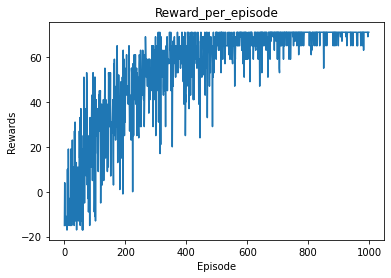

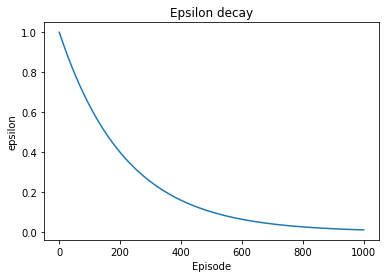

In [50]:
Q_learning_reward_per_episode = reward_per_episode
plt.plot(reward_per_episode)
plt.ylabel('Rewards') #set the label for y axis
plt.xlabel('Episode') #set the label for x-axis
plt.title("Reward_per_episode") #set the title of the graph
plt.show() #display the graph

plt.plot(epsilon_per_episode)
plt.ylabel('epsilon') #set the label for y axis
plt.xlabel('Episode') #set the label for x-axis
plt.title("Epsilon decay") #set the title of the graph
plt.show() #display the graph


In [51]:
## Q learning evaluation ##
number_of_episodes = 10
episode_number = 0
reward_per_episode = [] 
env.reset()
# with output_grid.output_to(0, 1):
#   env.render()
for episode in range(number_of_episodes):
  
  env.reset()
  episode_reward = 0
  done = False
  while done!=True:
    #Q_table_old = Q_table.copy()
    #Q_table[0] = 0
    #Q_table[-1] = 0
    #action = agent.step(obs)
    #old_state_idx = env.agent_pos[1] + (env.agent_pos[0] * env.environment_width)

    #action = agent.qaction(Q_table,epsilon)
    if env.environment_type != "deterministic":
      if np.random.random() > env.epsilon: # exploitation
        action = random.choice([0,1,2,3])

    old_state_idx = env.agent_pos[1] + (env.agent_pos[0] * env.environment_width)
    action = np.argmax(Q_table[old_state_idx])

    obs, reward, done,terminal_state_reached, action_new = env.step(action)
    episode_reward+=reward
    data.append([env.timestep, action, action_new])
    
    # if done:
    #   break
    # print()
    # print()
    # output_grid

    #time.sleep(1)
    # print("difference: ", np.max(Q_table_old - Q_table ))
    # if abs(np.max(Q_table_old - Q_table))<1 and episode_number> 50:
    #   break
    
    #epsilon = epsilon * decay_factor
    #epsilon_per_episode.append(epsilon)
    #reward_per_episode.append(episode_reward)
    episode_number+=1
  reward_per_episode.append(episode_reward)
  #print(episode_number)
  #print(Q_table)
  print()

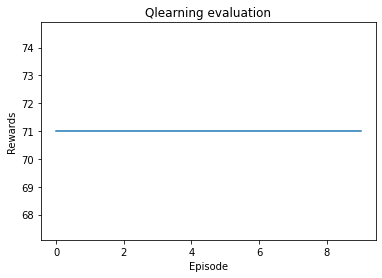

In [52]:
plt.plot(reward_per_episode)
plt.ylabel('Rewards') #set the label for y axis
plt.xlabel('Episode') #set the label for x-axis
plt.title("Qlearning evaluation") #set the title of the graph
plt.show() #display the graph

In [54]:
##SARSA##

alpha = 0.1
gamma = 0.9
epsilon = 1
epsilon_initial = 1
epsilon_final = 0.01
episode_number = 1

nstates = env.environment_width * env.environment_height
nactions = env.action_space.n
# Q_table = np.random.uniform(0,1,size=(nstates,nactions))
# Q_table[-1] = 0
Q_table = np.zeros((nstates,nactions))
env = GridEnvironment("deterministic")
agent = QAgent(env)
env.max_timesteps = 16
number_of_episodes = 500
episode_number = 0
obs = env.reset()
done = False
decay_factor = math.pow((epsilon_final / epsilon_initial),(1/number_of_episodes))
#print(decay_factor)
output_grid = widgets.Grid(1, 2)
# with output_grid.output_to(0, 1):
#   env.render()


data = []
reward_per_episode = []
epsilon_per_episode = []
epsilon_per_episode.append(epsilon)

for episode in range(number_of_episodes):
  env.reset()
  episode_reward = 0
  done = False
  Q_table_old = Q_table.copy()
  while done!=True:
    #Q_table[0] = 0
    Q_table[-1] = 0
    #action = agent.step(obs)
    action = agent.qaction(Q_table,epsilon)
    if env.environment_type != "deterministic":
      if np.random.random() > env.epsilon: # exploitation
        action = random.choice([0,1,2,3])

    old_state_idx = env.agent_pos[1] + (env.agent_pos[0] * env.environment_width)
    obs, reward, done,terminal_state_reached, action_new = env.step(action)
    episode_reward+=reward
    new_action = agent.qaction(Q_table,epsilon)
    SARSA_update(alpha,gamma,reward,epsilon,Q_table,action_new,env.agent_pos,old_state_idx,new_action)
    Q_table[-1] = 0

    #print(env.timestep)
    # if env.timestep % 100 == 0:
    #   print(Q_table)

    # if terminal_state_reached is True:
      
    #   reward_per_episode.append(episode_reward)
    #   env.reset()
    #   episode_number+=1
    #print(Q_table)
    #print("Timestep: {2}, action taken by agent: {0}, action done in env: {1}, state is \n {3}".format(action,action_new, env.timestep, env.state))
    data.append([env.timestep, action, action_new])
    # with output_grid.output_to(0, 1):
    #   output_grid.clear_cell()
      #env.render()
    # if done:
    #   break
    # print()
    # print()
    # output_grid

    #time.sleep(1)
  # print("difference: ", np.max(Q_table_old - Q_table ))
  # if abs(np.max(Q_table_old - Q_table))<1 and episode_number> 50:
  #   break
  
  epsilon = epsilon * decay_factor
  epsilon_per_episode.append(epsilon)
  reward_per_episode.append(episode_reward)
  episode_number+=1
  
  print(episode_number)
  print(Q_table)
  print()

,


Streaming output truncated to the last 5000 lines.
 [ 2.54638065e+01  3.79740715e+01  1.16424398e+01  1.99870183e+01]
 [ 1.44109161e+00 -1.01810928e+00 -1.40062981e+00 -9.43723388e-01]
 [ 1.97022973e+01  5.12408803e-01 -1.31533699e+00  1.02231184e+00]
 [ 3.68439743e+01  1.40020350e+00  2.83476382e+00  7.45410810e+00]
 [ 3.63301227e+01  2.39912534e+01  2.39692715e+01  3.07809205e+01]
 [ 3.26306402e-01 -8.66430612e-01 -3.85886216e-01 -9.58980168e-01]
 [-8.68135420e-01 -9.27123998e-01 -8.61568765e-01  2.73502362e+00]
 [ 9.27239046e+00 -1.00000000e-01  2.96118410e-01  3.80021839e+00]
 [ 1.54478064e+01  6.86189404e+00  1.35458430e+00  3.65086089e+01]
 [-5.00865413e-01 -9.05305951e-01 -5.32409240e-01 -5.55102652e-01]
 [-1.18000000e-01 -5.34630643e-01 -6.82657197e-01  3.01921746e-01]
 [ 1.90000000e+00  0.00000000e+00 -1.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

224
[[ 2.13260820e+01 -1.66315137e+00 -2.49211981e-02  3.88959370e+00]
 [ 2.

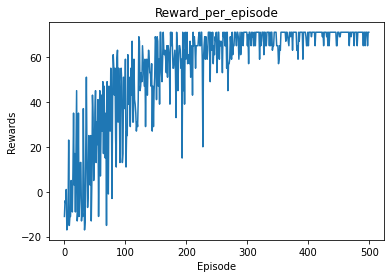

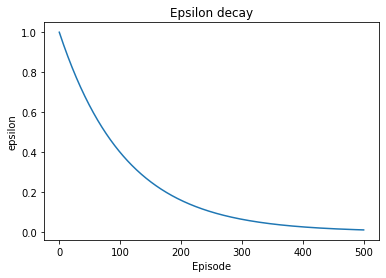

In [55]:
SARSA_reward_per_episode = reward_per_episode

plt.plot(reward_per_episode)
plt.ylabel('Rewards') #set the label for y axis
plt.xlabel('Episode') #set the label for x-axis
plt.title("Reward_per_episode") #set the title of the graph
plt.show() #display the graph

plt.plot(epsilon_per_episode)
plt.ylabel('epsilon') #set the label for y axis
plt.xlabel('Episode') #set the label for x-axis
plt.title("Epsilon decay") #set the title of the graph
plt.show() #display the graph


In [56]:
## SARSA  evaluation ##
number_of_episodes = 10
episode_number = 0
reward_per_episode = [] 
env.reset()
# with output_grid.output_to(0, 1):
#   env.render()
for episode in range(number_of_episodes):
  
  env.reset()
  episode_reward = 0
  done = False
  while done!=True:
    #Q_table_old = Q_table.copy()
    #Q_table[0] = 0
    #Q_table[-1] = 0
    #action = agent.step(obs)
    #old_state_idx = env.agent_pos[1] + (env.agent_pos[0] * env.environment_width)

    #action = agent.qaction(Q_table,epsilon)
    if env.environment_type != "deterministic":
      if np.random.random() > env.epsilon: # exploitation
        action = random.choice([0,1,2,3])

    old_state_idx = env.agent_pos[1] + (env.agent_pos[0] * env.environment_width)
    action = np.argmax(Q_table[old_state_idx])

    obs, reward, done,terminal_state_reached, action_new = env.step(action)
    episode_reward+=reward
    data.append([env.timestep, action, action_new])
    
    # if done:
    #   break
    # print()
    # print()
    # output_grid

    #time.sleep(1)
    # print("difference: ", np.max(Q_table_old - Q_table ))
    # if abs(np.max(Q_table_old - Q_table))<1 and episode_number> 50:
    #   break
    
    #epsilon = epsilon * decay_factor
    #epsilon_per_episode.append(epsilon)
    #reward_per_episode.append(episode_reward)
    episode_number+=1
  reward_per_episode.append(episode_reward)
  #print(episode_number)
  #print(Q_table)
  print()

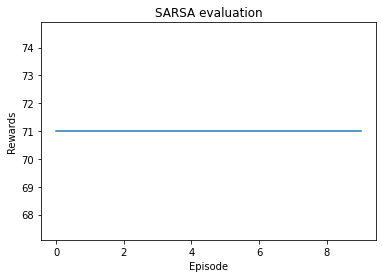

In [57]:
plt.plot(reward_per_episode)
plt.ylabel('Rewards') #set the label for y axis
plt.xlabel('Episode') #set the label for x-axis
plt.title("SARSA evaluation") #set the title of the graph
plt.show() #display the graph

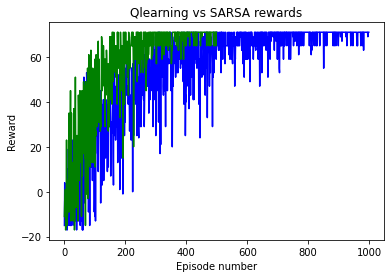

In [58]:
plt.plot(Q_learning_reward_per_episode, color = 'b')
plt.plot(SARSA_reward_per_episode, color = 'g')
plt.xlabel('Episode number') #set the label for x-axis
plt.ylabel('Reward') #set the label for y axis

plt.title("Qlearning vs SARSA rewards") #set the title of the graph
plt.show() #display the graph